**EDA**

In [2]:
!pip install pycaret
!pip install ipywidgets
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

*Explore the data*

In [4]:
train_df = pd.read_csv(r'C:\Users\mosta\OneDrive\Documents\Kaggle competition\loan approuval\data\train.csv')
test_df = pd.read_csv(r'C:\Users\mosta\OneDrive\Documents\Kaggle competition\loan approuval\data\test.csv')


In [5]:
train_df.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

In [6]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [7]:
train_df.shape

(58645, 13)

In [8]:
train_df.describe()

id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length   loan_status  
count                58645.000000  58645.000000  
mean                     5.813556      0.142382  
std                      4.029196      0.349445  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [10]:
number_of_loan_accepted = train_df['loan_status'].value_counts()
print(number_of_loan_accepted)

loan_status
0    50295
1     8350
Name: count, dtype: int64


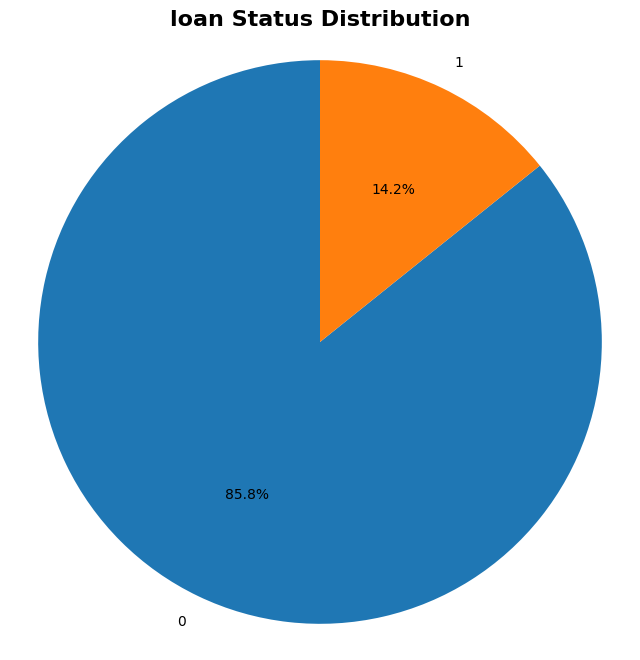

In [11]:
def pie_plot(data, plot_title):
  # Create the pie chart
  plt.figure(figsize=(8, 8))
  plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
  plt.title(plot_title, fontsize=16, fontweight='bold')
  plt.axis('equal')

  # Display the chart
  plt.show()
pie_plot(train_df["loan_status"].value_counts(),
         plot_title="loan Status Distribution")

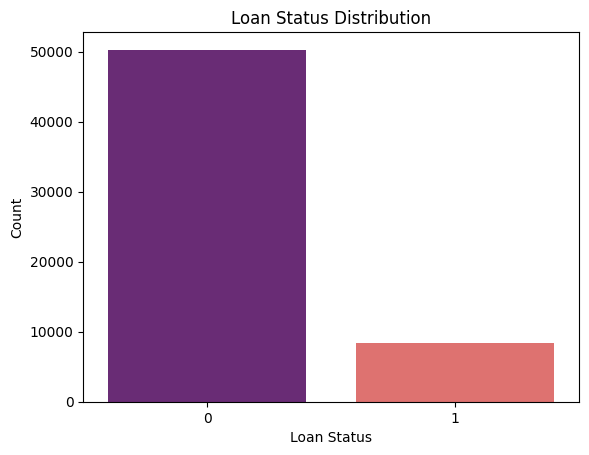

In [12]:
sns.countplot(x='loan_status', data=train_df, palette="magma")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


This chart shows a significant class imbalance in `loan_status`, with far more instances of class `0` than class `1`. Addressing this imbalance will be important for improving model accuracy on the minority class.

In [13]:
train_df['loan_intent']

0        EDUCATION
1          MEDICAL
2         PERSONAL
3          VENTURE
4          MEDICAL
           ...    
58640    EDUCATION
58641      MEDICAL
58642    EDUCATION
58643    EDUCATION
58644      VENTURE
Name: loan_intent, Length: 58645, dtype: object

In [14]:
train_df['loan_intent'] = train_df['loan_intent'].astype('category')
loan_intent_counts = train_df['loan_intent'].value_counts()
loan_intent_percentages = (loan_intent_counts / loan_intent_counts.sum()) * 100

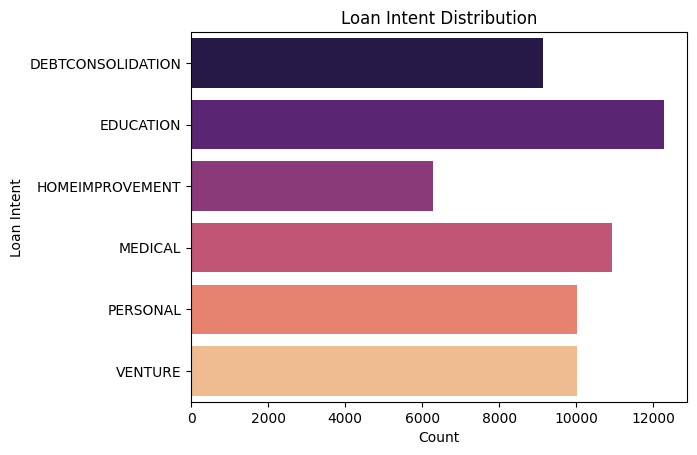

In [15]:
sns.barplot(x=loan_intent_counts.values, y=loan_intent_counts.index, palette="magma")
plt.title("Loan Intent Distribution")
plt.xlabel("Count")
plt.ylabel("Loan Intent")
plt.show()

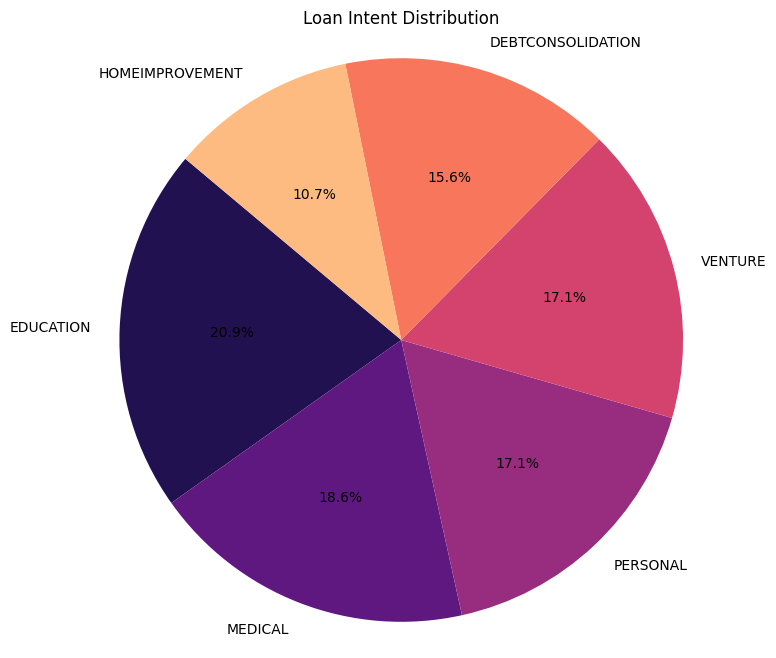

In [16]:
plt.figure(figsize=(8, 8))
custom_colors = sns.color_palette("magma", n_colors=len(loan_intent_percentages))
plt.pie(
    loan_intent_percentages,
    labels=loan_intent_percentages.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors
)
plt.axis('equal')
plt.title("Loan Intent Distribution")
plt.show()

In [17]:
train_df["person_age"] = train_df["person_age"].astype('int64')

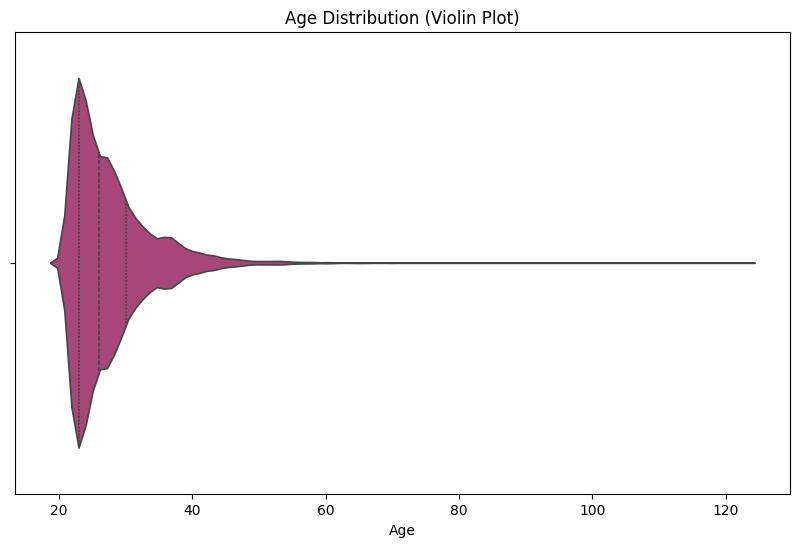

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=train_df["person_age"], inner="quartile", palette="magma")
plt.title("Age Distribution (Violin Plot)")
plt.xlabel("Age")
plt.show()

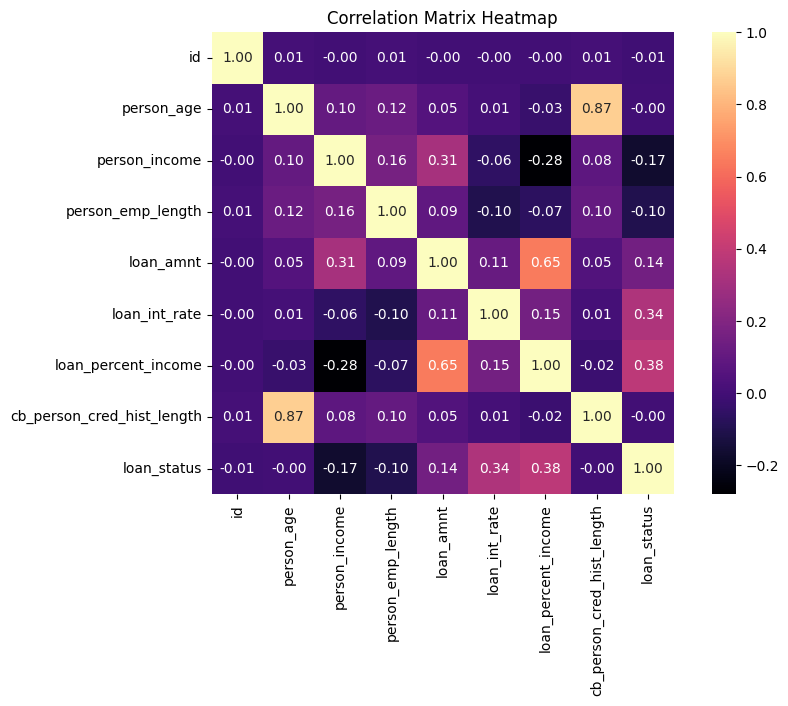

In [19]:
numeric_cols = train_df.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

*Applicant Income vs.Loan Amount*

In [20]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

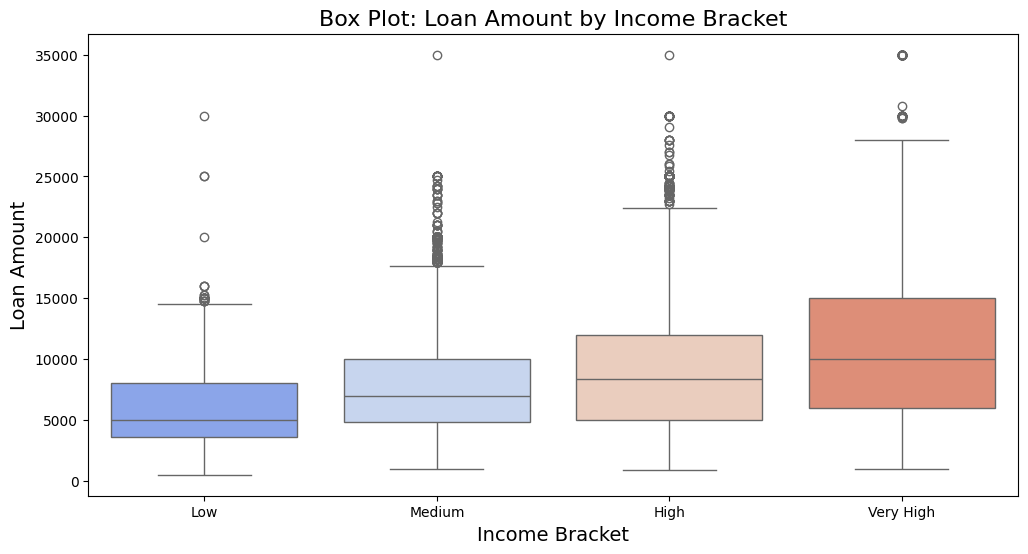

In [21]:
plt.figure(figsize=(12, 6))

# Create income brackets for the box plot
train_df['income_bracket'] = pd.cut(train_df['person_income'], bins=[0, 30000, 50000, 70000, 90000],
                                      labels=['Low', 'Medium', 'High', 'Very High'])

# Create a box plot
sns.boxplot(data=train_df, x='income_bracket', y='loan_amnt', palette='coolwarm')

# Add labels and title
plt.xlabel('Income Bracket', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.title('Box Plot: Loan Amount by Income Bracket', fontsize=16)

# Show the plot
plt.show()


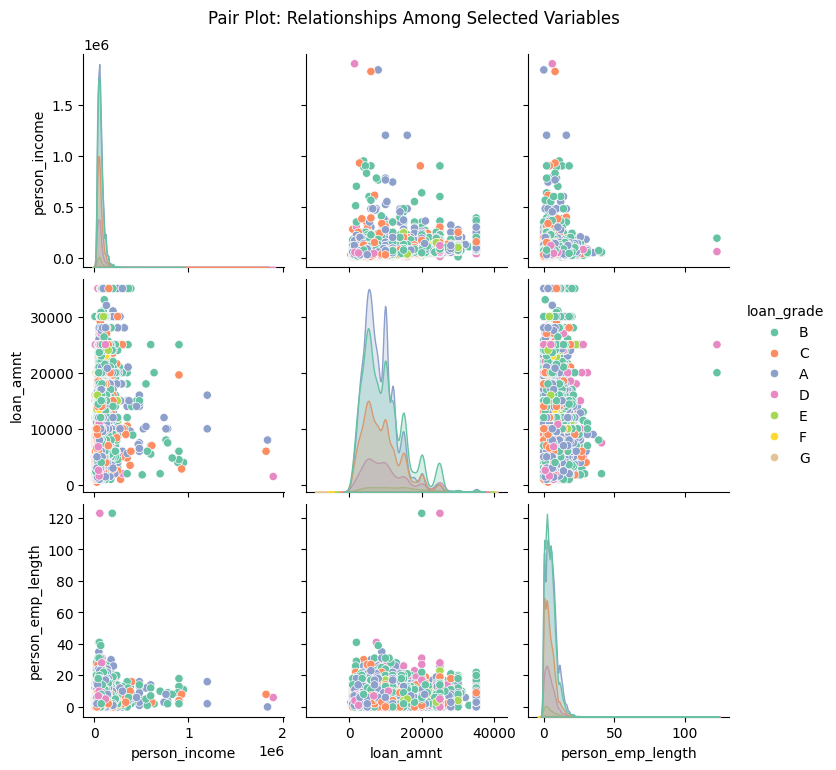

In [22]:
# Create a pair plot to visualize relationships
sns.pairplot(train_df, vars=['person_income', 'loan_amnt', 'person_emp_length'], hue='loan_grade', palette='Set2')

# Show the plot
plt.suptitle('Pair Plot: Relationships Among Selected Variables', y=1.02)
plt.show()


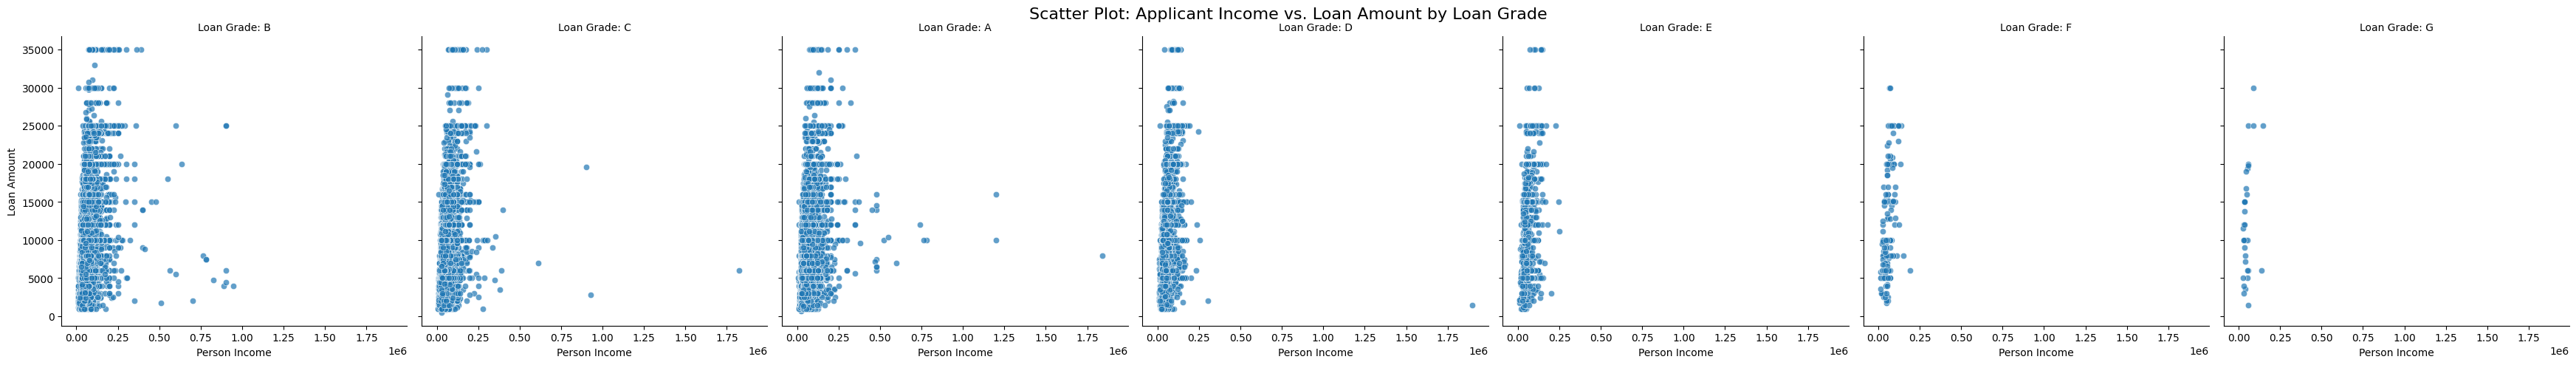

In [23]:
g = sns.FacetGrid(train_df, col='loan_grade', height=5, aspect=1)
g.map(sns.scatterplot, 'person_income', 'loan_amnt', alpha=0.7)

# Add titles
g.set_titles(col_template='Loan Grade: {col_name}')
g.set_axis_labels('Person Income', 'Loan Amount')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot: Applicant Income vs. Loan Amount by Loan Grade', fontsize=16)

# Show the plot
plt.show()


In [24]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'income_bracket'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [26]:
# Handle missing values if necessary
train_df.fillna(method='ffill', inplace=True)

In [27]:
train_df = pd.get_dummies(train_df, columns=['loan_intent', 'loan_grade'], drop_first=True)

In [28]:
train_df.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

   loan_amnt  loan_int_rate  loan_percent_income cb_person_default_on_file  \
0       6000          11.49                 0.17                         N   
1       4000          13.35                 0.07                         N   
2       6000           8.90                 0.21                         N   
3      12000          11.11                 0.17                         N   
4       6000           6.92                 0.10                         N   

   cb_person_cred_hist_length  ...  loan_intent_HOMEIMPROVEMENT  \
0                          14  ...                        False   
1                           2  ...                        False   
2                          10  ...                        False   
3                           5  ...                        False   
4                           3  ...                        False   

  loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  \
0               False                 False                False   
1                True                 False                False   
2               False                  True                False   
3               False                 False                 True   
4                True                 False                False   

   loan_grade_B  loan_grade_C  loan_grade_D  loan_grade_E  loan_grade_F  \
0          True         False         False         False         False   
1         False          True         False         False         False   
2         False         False         False         False         False   
3          True         False         False         False         False   
4         False         False         False         False         False   

   loan_grade_G  
0         False  
1         False  
2         False  
3         False  
4         False  

[5 rows x 23 columns]

In [29]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

In [30]:
# Create an imputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Create an imputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

In [31]:
# Apply the imputers
train_df[numerical_cols] = num_imputer.fit_transform(train_df[numerical_cols])
train_df[categorical_cols] = cat_imputer.fit_transform(train_df[categorical_cols])

# Feature Engineering


In [32]:
# Create income brackets for the 'person_income' variable
train_df['income_bracket'] = pd.cut(train_df['person_income'], bins=[0, 30000, 50000, 70000, 90000],
                                      labels=['Low', 'Medium', 'High', 'Very High'])

In [33]:
# Create interaction terms (for demonstration, you can create other combinations)
train_df['income_emp_length'] = train_df['person_income'] * train_df['person_emp_length']

# Normalization/Standardization

In [34]:
# Initialize a scaler for numerical features
scaler = StandardScaler()

# Apply scaling to numerical features
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Encoding Categorical Variables

In [35]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),   # Scale numerical features
        ('cat', OneHotEncoder(), categorical_cols)    # One-hot encode categorical features
    ])

# Train-Test Split

In [36]:
from pycaret.classification import *
from pycaret.classification import setup, compare_models, evaluate_model, predict_model, save_model, load_model

In [37]:
train_df

id  person_age  person_income person_home_ownership  \
0     -1.732021    1.566200      -0.765768                  RENT   
1     -1.731962   -0.920057      -0.212128                   OWN   
2     -1.731903    0.240196      -0.929223                   OWN   
3     -1.731844    0.405947       0.156966                  RENT   
4     -1.731785   -0.920057      -0.106673                  RENT   
...         ...         ...            ...                   ...   
58640  1.731785    1.068949       1.475156              MORTGAGE   
58641  1.731844    0.074446      -0.929223                  RENT   
58642  1.731903   -0.754307      -0.528494                  RENT   
58643  1.731962   -0.920057      -0.897587                  RENT   
58644  1.732021    0.571697       0.288785              MORTGAGE   

       person_emp_length  loan_amnt  loan_int_rate  loan_percent_income  \
0              -1.187200  -0.578306       0.267616             0.117378   
1               0.328047  -0.937775       0.880532            -0.973242   
2               0.833130  -0.578306      -0.585854             0.553626   
3               2.348377   0.500101       0.142396             0.117378   
4              -0.682117  -0.578306      -1.238314            -0.646056   
...                  ...        ...            ...                  ...   
58640           0.075506   2.836651       1.737297             0.553626   
58641          -1.187200   0.140632       0.676227             2.080493   
58642           0.580588  -0.434518       1.753773            -0.100746   
58643          -0.682117  -0.758041      -0.585854             0.117378   
58644          -0.682117   1.039305       0.142396             0.444564   

      cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                             N                    2.031798  ...   
1                             N                   -0.946489  ...   
2                             N                    1.039036  ...   
3                             N                   -0.201917  ...   
4                             N                   -0.698298  ...   
...                         ...                         ...  ...   
58640                         Y                    1.039036  ...   
58641                         N                    0.542655  ...   
58642                         N                   -0.946489  ...   
58643                         N                   -0.698298  ...   
58644                         N                   -0.201917  ...   

       loan_intent_MEDICAL loan_intent_PERSONAL  loan_intent_VENTURE  \
0                    False                False                False   
1                     True                False                False   
2                    False                 True                False   
3                    False                False                 True   
4                     True                False                False   
...                    ...                  ...                  ...   
58640                False                False                False   
58641                 True                False                False   
58642                False                False                False   
58643                False                False                False   
58644                False                False                 True   

       loan_grade_B  loan_grade_C  loan_grade_D  loan_grade_E  loan_grade_F  \
0              True         False         False         False         False   
1             False          True         False         False         False   
2             False         False         False         False         False   
3              True         False         False         False         False   
4             False         False         False         False         False   
...             ...           ...           ...           ...           ...   
58640         False         False          True         Fals

In [38]:
# Reload the dataset to ensure all columns are present, if needed
train_df = pd.read_csv(r'C:\Users\mosta\OneDrive\Documents\Kaggle competition\loan approuval\data\train.csv')
test_df = pd.read_csv(r'C:\Users\mosta\OneDrive\Documents\Kaggle competition\loan approuval\data\test.csv')


# Drop the 'id' column if present
if 'id' in train_df.columns:
    train_df.drop(columns=['id'], inplace=True)

# Convert categorical columns with multiple categories into dummy variables
train_df = pd.get_dummies(train_df, columns=['loan_intent', 'loan_grade'], drop_first=True)

# Set the remaining categorical features to 'category' type
categorical_features = ['person_home_ownership', 'cb_person_default_on_file']
for feature in categorical_features:
    train_df[feature] = train_df[feature].astype('category')

# Drop 'income_bracket' if not needed
if 'income_bracket' in train_df.columns:
    train_df.drop(columns=['income_bracket'], inplace=True)

# Now set up PyCaret environment with `loan_status` as the target
clf = setup(data=train_df, target='loan_status', session_id=42,
             normalize=True,
             categorical_features=categorical_features,
             numeric_features=['person_age', 'person_income', 'person_emp_length',
                              'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                              'cb_person_cred_hist_length'])

In [39]:
best_model = compare_models()

In [40]:
tuned_lightgbm = tune_model(best_model)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


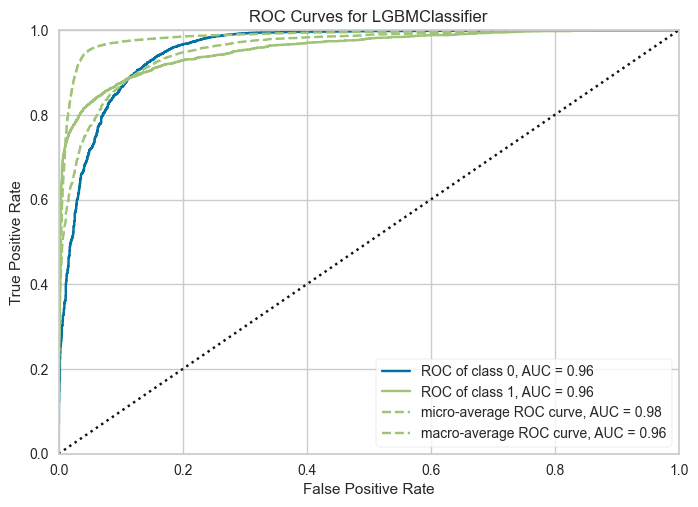

In [41]:
plot_model(tuned_lightgbm, plot='auc')  # AUC curve

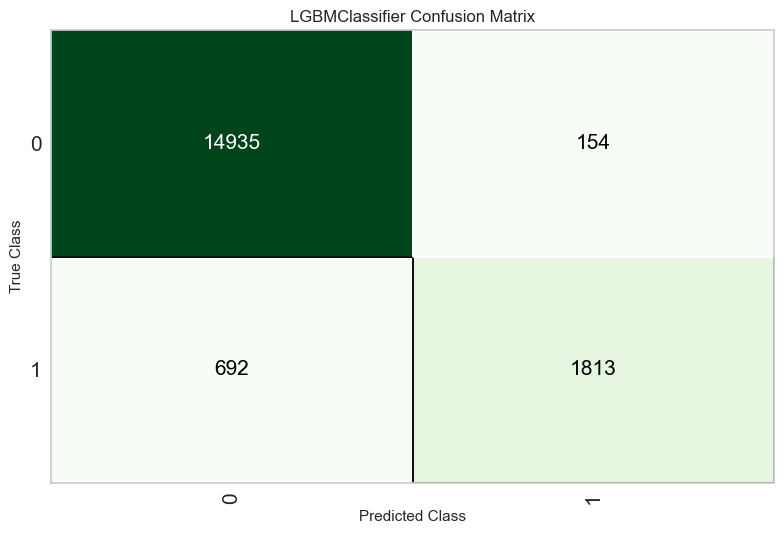

In [42]:
plot_model(tuned_lightgbm, plot='confusion_matrix')  # Confusion matrix

In [43]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [44]:
final_lightgbm

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['person_age', 'person_income',
                                             'person_emp_length', 'loan_amnt',
                                             'loan_int_rate',
                                             'loan_percent_income',
                                             'cb_person_cred_hist_length'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=n...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=42,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [45]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [46]:
# Split your data into training and testing sets
X = train_df.drop('loan_status', axis=1)
y = train_df['loan_status']

In [47]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Step 2: Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [49]:
# Step 3: Define the parameters for LightGBM
params = {
    'objective': 'binary',         # Since we are predicting a binary outcome
    'metric': 'binary_logloss',    # Evaluation metric
    'boosting_type': 'gbdt',       # Gradient Boosting Decision Tree
    'learning_rate': 0.1,          # Learning rate
    'num_leaves': 31,              # Maximum number of leaves in one tree
    'verbose': -1                  # Suppress verbose output
}

In [50]:
# Step 4: Train the LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=100)

In [51]:
# Step 5: Make predictions on the test set
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary outcomes

In [52]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

In [53]:
# Print the evaluation results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9527
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.91      0.73      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729

Confusion Matrix:
[[9969  118]
 [ 437 1205]]


In [54]:
def visualize_confusion_matrix(cm, class_names):
    """
    Visualizes the confusion matrix using a heatmap.

    Parameters:
    cm (array-like): Confusion matrix.
    class_names (list): List of class names.
    """
    plt.figure(figsize=(8, 6))
    
    # Create a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    
    # Adding labels and title
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [55]:
def visualize_report(report):
    """
    Visualizes the classification report using a heatmap.

    Parameters:
    report (dict or DataFrame): Classification report from sklearn.metrics.classification_report.
    """
    # Convert the report into a DataFrame
    report_df = pd.DataFrame(report).transpose()
    
    # Select the relevant metrics: precision, recall, and f1-score
    metrics = report_df[['precision', 'recall', 'f1-score']]

    # Create a heatmap for better visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics, annot=True, fmt=".2f", cmap="Blues", cbar=True)
    
    # Adding labels and title
    plt.title('Classification Report Heatmap')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.xticks(rotation=90)
    
    # Display the heatmap
    plt.tight_layout()
    plt.show()

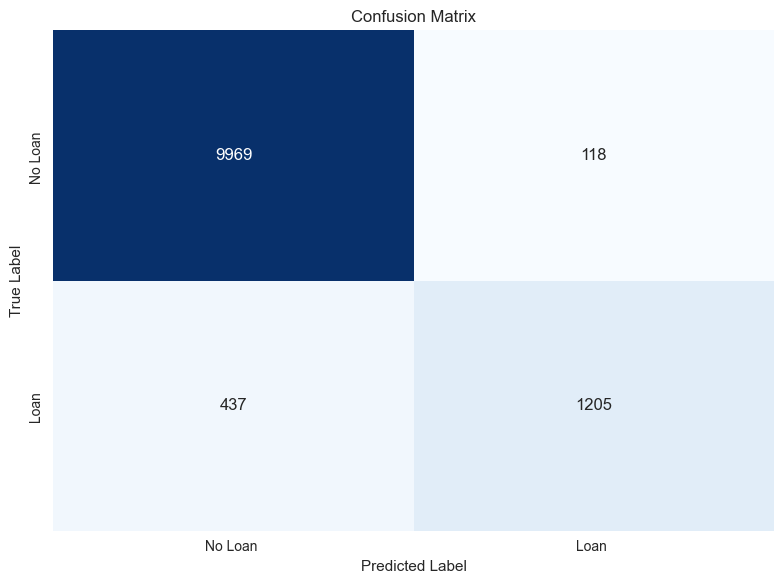

In [56]:
# Assuming y_test and y_pred_binary are already defined
cm = confusion_matrix(y_test, y_pred_binary)  # Compute the confusion matrix
class_names = ['No Loan ', 'Loan ']  # Replace with your class names
visualize_confusion_matrix(cm, class_names)  # Call the visualization function

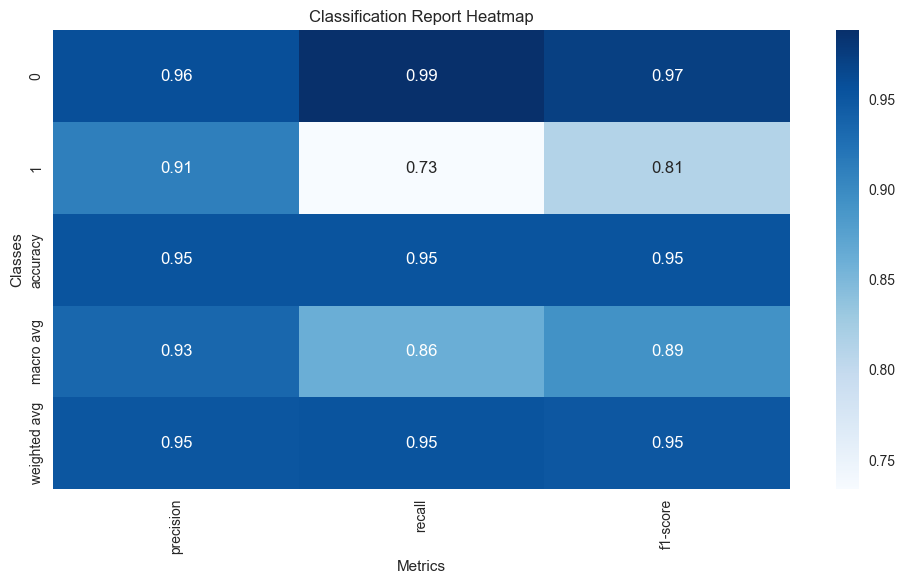

In [57]:
# Assuming y_test and y_pred_binary are already defined
report = classification_report(y_test, y_pred_binary, output_dict=True)  # Get report as a dictionary
visualize_report(report)  # Call the visualization function

In [59]:
sample = pd.read_csv( r'data\sample_submission.csv')

In [60]:
sample.head()

id  loan_status
0  58645          0.5
1  58646          0.5
2  58647          0.5
3  58648          0.5
4  58649          0.5

In [63]:
sample['loan_status'] = predictions['loan_status']

NameError: name 'predictions' is not defined